In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
print(diabetes.data[0:3])


[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]


In [4]:
print(diabetes.target[:3])

[151.  75. 141.]


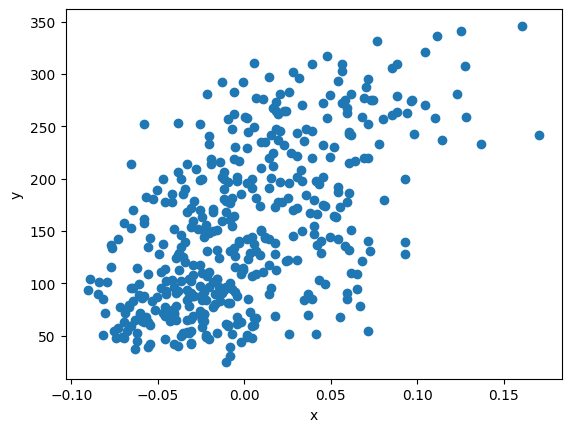

In [5]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target) # 입력데이터의 3번째 변수와 타깃데이터
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
x = diabetes.data[:, 2] # 3번째 변수만 선택
y = diabetes.target

In [7]:
print(x[0:5])
print(y[0:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [8]:
w = 1.0
b = 1.0

y_hat = x[0] * w + b

print(y_hat) # 예측값

print(y[0]) # 실제값

1.0616962065186832
151.0


In [9]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc) # y_hat_inc가 y_hat(1.0616962065186886 )보다 조금 증가

1.0678658271705517


In [10]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [11]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [12]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [13]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [14]:
b_new = b + 1
print(b_new)

2.0


In [15]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [16]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [17]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


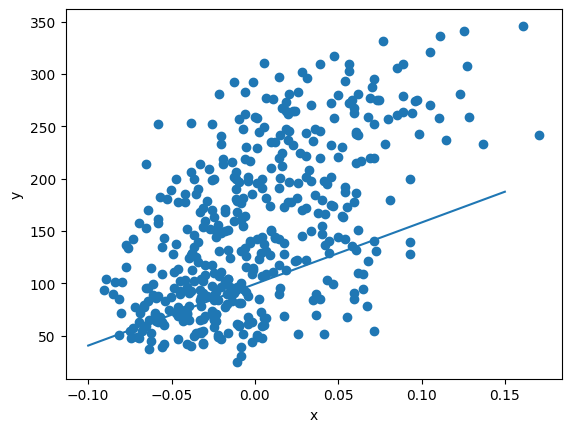

In [18]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


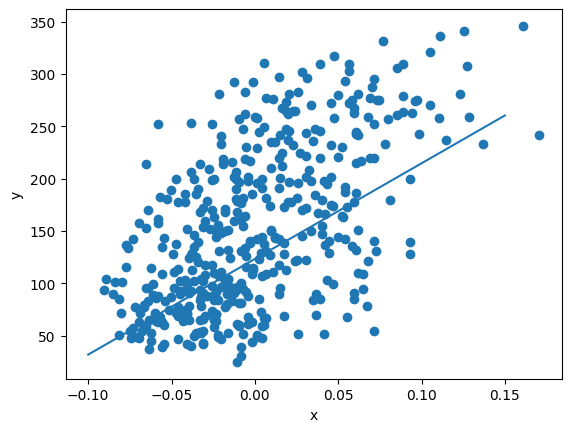

In [20]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

287.8416643900139


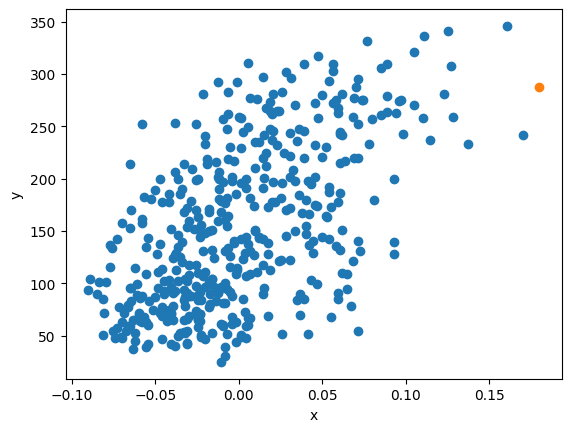

In [21]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
class Neuron:
  def __init__(self):
    self.w = 1.0 # 가중치를 초기화합니다
    self.b = 1.0 # 절편을 초기화합니다
  def forpass(self, x):
    y_hat = x * self.w + self.b # 직선 방정식을 계산합니다
    return y_hat
  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그래디언트를 계산합니다
    b_grad = 1 * err # 절편에 대한 그래디언트를 계산합니다
    return w_grad, b_grad # 2개의 결과를 반환 (return)
  def fit(self, x, y, epochs=100):
    for i in range(epochs): # 에포크만큼 반복합니다
      for x_i, y_i in zip(x, y): # 모든 샘플에 대해 반복합니다
        y_hat = self.forpass(x_i) # 정방향 계산
        err = -(y_i - y_hat) # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
        self.w = self.w - w_grad # 가중치 업데이트
        self.b = self.b - b_grad # 절편 업데이트
    print('w=',self.w, 'b=',self.b)

neuron = Neuron()
neuron.fit(x, y)

w= 913.5973364346786 b= 123.39414383177173


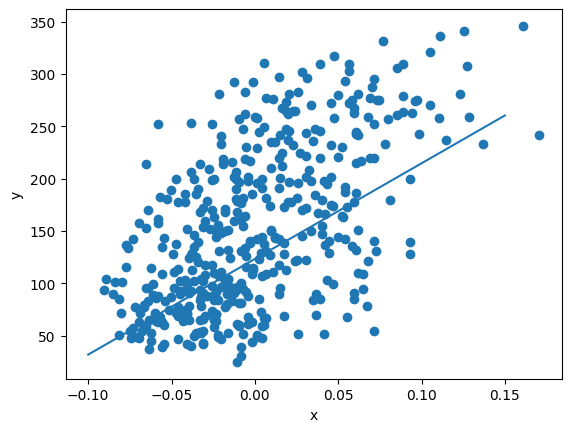

In [23]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
import seaborn as sns
iris=sns.load_dataset('iris')
x = iris['petal_length']
y = iris['sepal_length']
print(x)
print(y)

# 𝑦𝑦 = 𝑏𝑏0 + 𝑏𝑏1𝑥𝑥
# 𝑏𝑏0와𝑏𝑏1을 구하여라.
# 나중에 할거

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


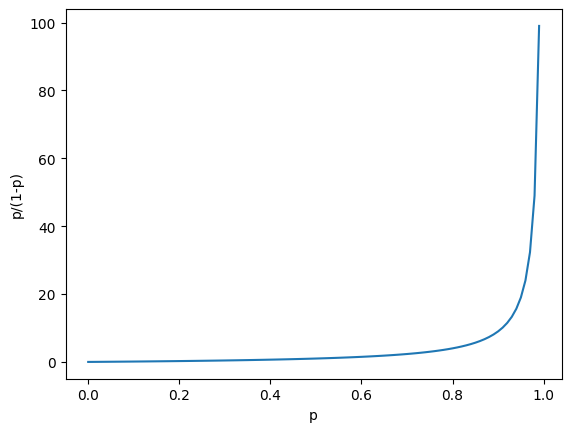

In [25]:
import matplotlib.pyplot as plt
import numpy as np

probs = np.arange(0, 1, 0.01)
print(probs)
odds = [p/(1
-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012
 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024
 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036
 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048
 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06
 0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072
 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084
 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096
 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107 0.108
 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119 0.12
 0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131 0.132
 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143 0.144
 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155 0.156
 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.164 0.16

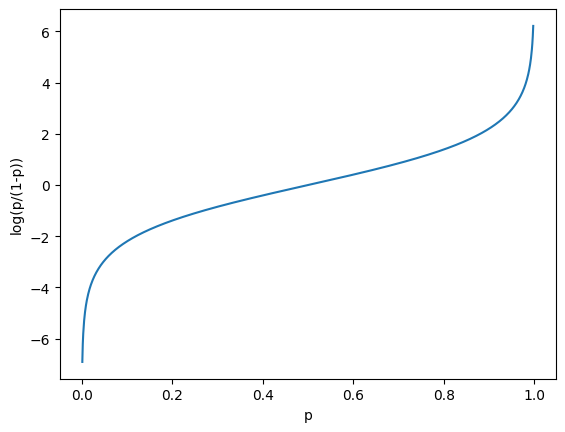

In [26]:
import matplotlib.pyplot as plt
import numpy as np

probs = np.arange(0.001, 0.999, 0.001)
print(probs)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()


[-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000

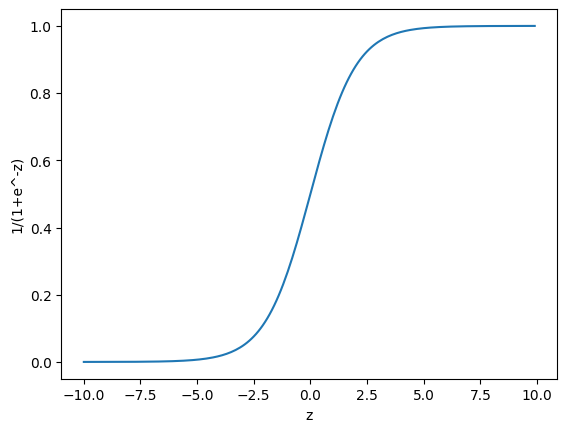

In [27]:
import matplotlib.pyplot as plt
import numpy as np
zs = np.arange(-10., 10., 0.1)
print(zs)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)
print(cancer.data[:3]) # 처음 3개의 샘플
print(cancer.target[:3])

(569, 30) (569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]
[0 0 0]


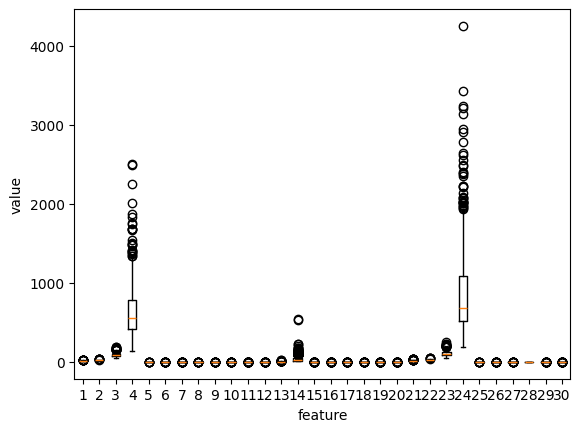

In [29]:
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [30]:
cancer.feature_names[[3,13,23]] # Python은 index가 0부터 시작

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [31]:
import numpy as np
print(np.unique(cancer.target, return_counts=True))

(array([0, 1]), array([212, 357]))


In [32]:
x = cancer.data
y = cancer.target
print(x)
print(y)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape) # trainin과 test의 비율이 대략 4:1 정도 됨
# (455, 30) (114, 30)
print(np.unique(y_train, return_counts=True)) # 양성(1)이 음성(0) 클래스보다 1.7 배 정도 많음

(455, 30) (114, 30)
(array([0, 1]), array([170, 285]))


In [34]:
import numpy as np
a=np.array([1,2,3])
b=np.array([3,4,5])
print(a) # [1 2 3]
print(b) # [3 4 5]
print(a+b) # [4 6 8]
print(a*b) # [ 3 8 15]
print(np.sum(a*b)) # 26 = 3+8+15


[1 2 3]
[3 4 5]
[4 6 8]
[ 3  8 15]
26


In [35]:
class LogisticNeuron:
  def __init__(self): # 가중치와 절편은 미리 초기화 하지 않음
    self.w = None
    self.b = None
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식을 계산, x와 w는 1차원 numpy 배열, 배열의 요소끼리 자동계산
    return z
  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그래디언트 계산
    b_grad = 1 * err # 절편에 대한 그래디언트 계산
    return w_grad, b_grad
  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치를 1로 초기화, np.ones( ) 함수는 지정한 크기의 배열을 만들고 모두 1로 채움
    self.b = 0 # 절편을 0으로 초기화
    for i in range(epochs): # epochs만큼 반복
      for x_i, y_i in zip(x, y): # 모든 샘플에 대해 반복
        z = self.forpass(x_i) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y_i - a) # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트 self.w = self.w - w_grad
        self.b -= b_grad # 절편 업데이트 self.b = self.b - b_grad
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    a = self.activation(np.array(z)) # 활성화 함수 적용
    return a > 0.5 # 계단 함수 적용

In [36]:
import numpy as np

print(np.zeros((2,3)))
print(np.full((2,3),7))

[[0. 0. 0.]
 [0. 0. 0.]]
[[7 7 7]
 [7 7 7]]


In [37]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

print(np.mean(neuron.predict(x_test) == y_test))

<ipython-input-35-1f3e876e61de>:13: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


0.8245614035087719


In [38]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
    return z
  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err # 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad
  def add_bias(self, X):
    return np.c_[np.ones((X.shape[0], 1)), X] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가
  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    for i in range(epochs): # epochs만큼 반복
      loss = 0 # 인덱스를 섞습니다
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes: # 모든 샘플에 대해 반복
        z = self.forpass(x[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a) # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트
# 안전한 로그 계산을 위하여 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a) )# 에포크마다 평균 손실을 저장

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0 # 스텝 함수 적용
  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [39]:
layer = SingleLayer()
layer.fit(x_train, y_train)
print(layer.score(x_test, y_test))

<ipython-input-38-1642abdfee25>:16: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


0.9473684210526315


In [40]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [41]:
import pandas as pd

url="https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
AB=pd.read_csv(url, header=None,
names=['Sex','Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings'])
print(AB.head())
X=AB[['Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings']]
y=AB[['Sex']]

import numpy as np
y_ab=np.where(y=="I",1,0)
print(np.unique(y_ab, return_counts=True))

  Sex  Length  Diameter  Height   Whole  Shucked  Viscera  Shell  Rings
0   M   0.455     0.365   0.095  0.5140   0.2245   0.1010  0.150     15
1   M   0.350     0.265   0.090  0.2255   0.0995   0.0485  0.070      7
2   F   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.210      9
3   M   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.155     10
4   I   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.055      7
(array([0, 1]), array([2835, 1342]))


In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(x_train_all, y_train_all)
print(sgd.score(x_test, y_test))

0.8333333333333334


In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(x_train_all, y_train_all)
print(sgd.score(x_test, y_test))

0.9385964912280702


In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [45]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

print(len(x_train), len(x_val))

364 91


In [46]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log_loss', random_state=42)
sgd.fit(x_train, y_train)
print(sgd.score(x_val, y_val))

0.6923076923076923


In [47]:
class SingleLayer:
  def __init__(self,  learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
    return z
  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err # 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad
  def add_bias(self, X):
    return np.c_[np.ones((X.shape[0], 1)), X] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가
  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    for i in range(epochs): # epochs만큼 반복
      loss = 0 # 인덱스를 섞습니다
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes: # 모든 샘플에 대해 반복
        z = self.forpass(x[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a) # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= self.lr * w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트
# 안전한 로그 계산을 위하여 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a) )# 에포크마다 평균 손실을 저장
    self.losses.append(loss/len(y))
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0 # 스텝 함수 적용
  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [48]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)

print(layer1.score(x_val, y_val))

<ipython-input-47-72415f98cb75>:18: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z)) # 시그모이드 계산


0.8791208791208791


IndexError: list index out of range

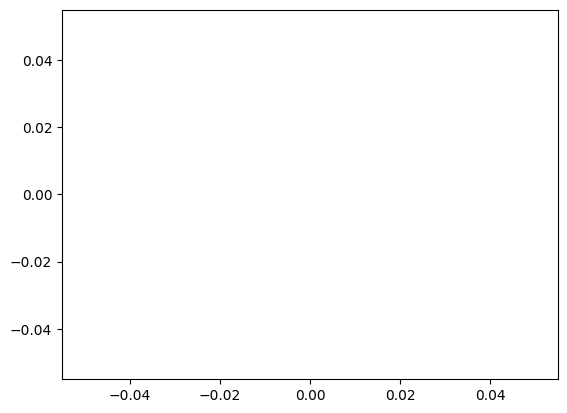

In [61]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro') # 'ro ' r은 red, o는 marker의 모양, 예를 들어 ‘w^‚는 흰색 삼각형
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [62]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

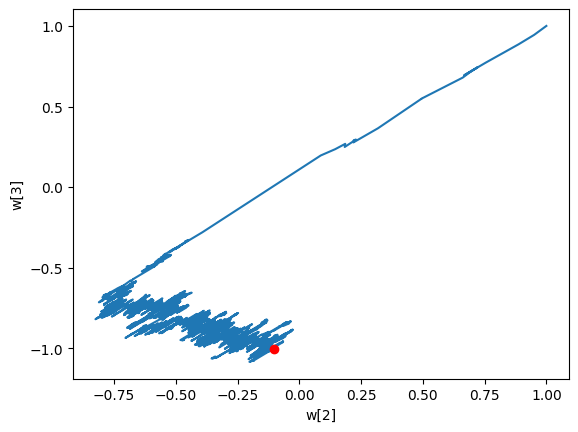

In [63]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)

w2 = []
w3 = []

for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [64]:
print(layer2.score(x_val, y_val))

val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
print(layer2.score(x_val_scaled, y_val))

0.37362637362637363
0.967032967032967


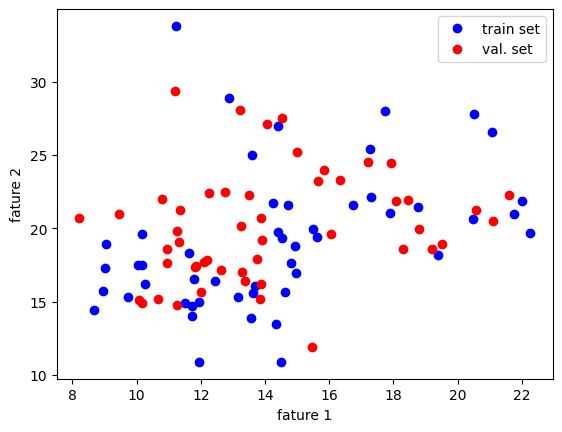

In [65]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

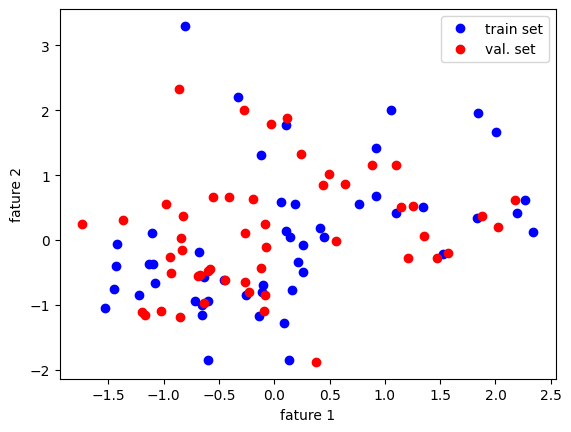

In [66]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

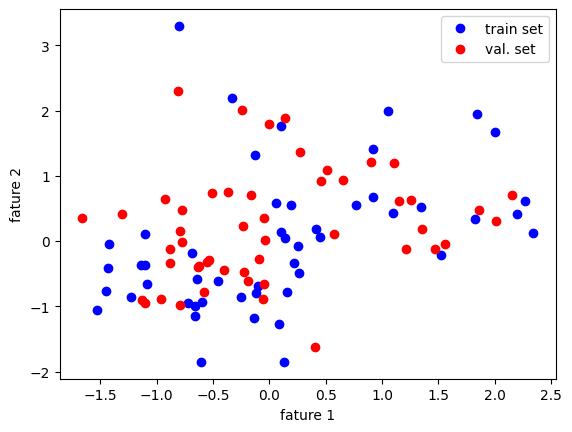

In [67]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('fature 1')
plt.ylabel('fature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [68]:
print(layer2.score(x_val_scaled, y_val))

0.967032967032967


In [69]:
class SingleLayer:
  def __init__(self,  learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
    return z
  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err # 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad
  def add_bias(self, X):
    return np.c_[np.ones((X.shape[0], 1)), X] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가
  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a
  def updata_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i]) # 정방향 계산
      a = self.activation(z) # 활성화 함수 적용
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1]) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    for i in range(epochs): # epochs만큼 반복
      loss = 0 # 인덱스를 섞습니다
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes: # 모든 샘플에 대해 반복
        z = self.forpass(x[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a) # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        self.w -= self.lr * w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트
# 안전한 로그 계산을 위하여 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a) )# 에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))
      self.updata_val_loss(x_val,y_val)
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0 # 스텝 함수 적용
  def score(self, x, y):
    return np.mean(self.predict(x) == y)


In [70]:
layer3 = SingleLayer()

layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

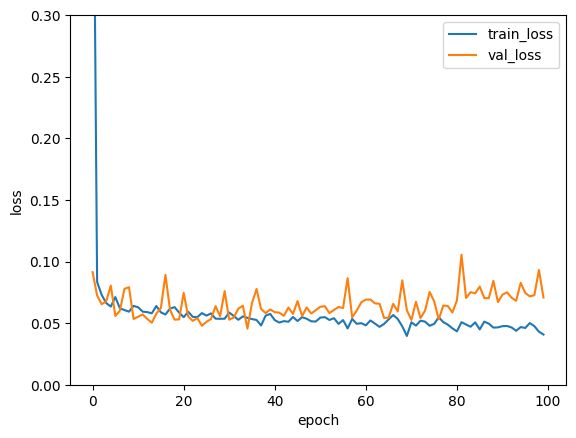

In [71]:
plt.ylim(0, 0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [72]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=20)
print(layer4.score(x_val_scaled, y_val))


0.978021978021978


In [73]:
class SingleLayer:
  def __init__(self,  learning_rate=0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식을 계산
    return z
  def backprop(self, x, err):
    w_grad = x * err # 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err # 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad
  def add_bias(self, X):
    return np.c_[np.ones((X.shape[0], 1)), X] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가
  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a
  def updata_val_loss(self, x_val, y_val):
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i]) # 정방향 계산
      a = self.activation(z) # 활성화 함수 적용
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())
  def reg_loss(self):
     return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    self.w = np.ones(x.shape[1]) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    self.w_history.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs): # epochs만큼 반복
      loss = 0 # 인덱스를 섞습니다
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes: # 모든 샘플에 대해 반복
        z = self.forpass(x[i]) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y[i] - a) # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
        self.w -= self.lr * w_grad # 가중치 업데이트
        self.b -= b_grad # 절편 업데이트
        self.w_history.append(self.w.copy())
# 안전한 로그 계산을 위하여 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a) )# 에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y) + self.reg_loss())
      self.updata_val_loss(x_val,y_val)
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 정방향 계산
    return np.array(z) > 0 # 스텝 함수 적용
  def score(self, x, y):
    return np.mean(self.predict(x) == y)


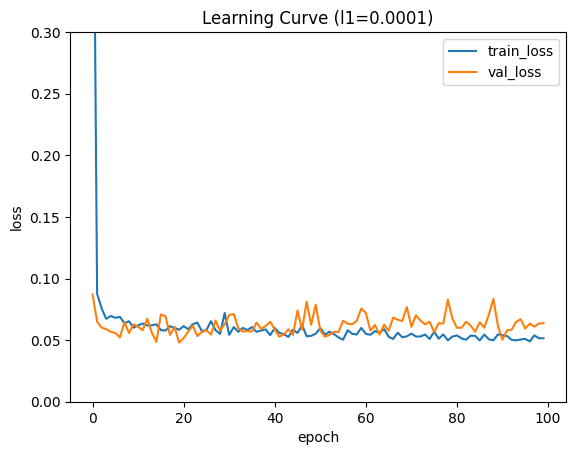

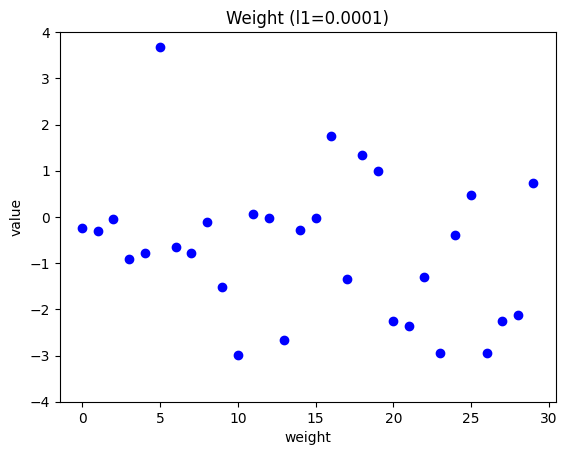

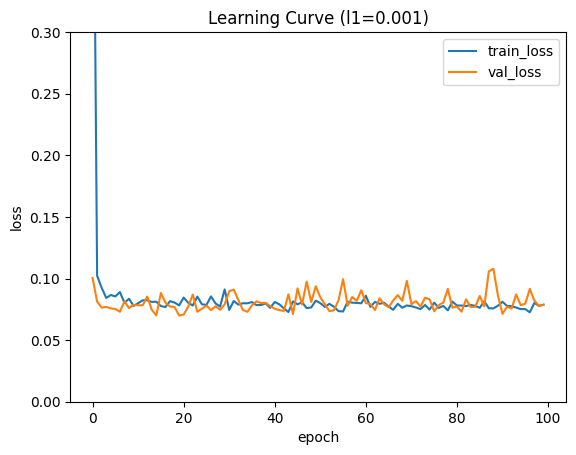

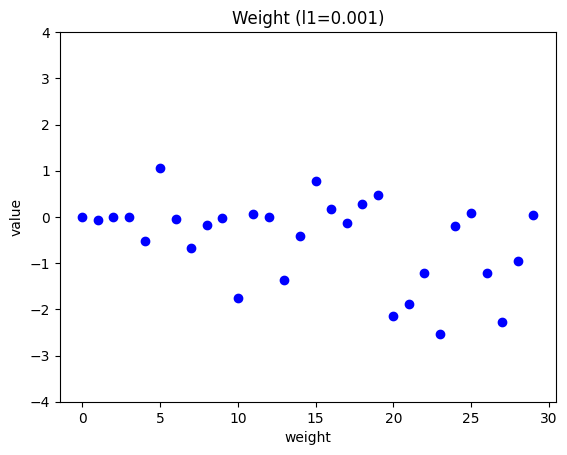

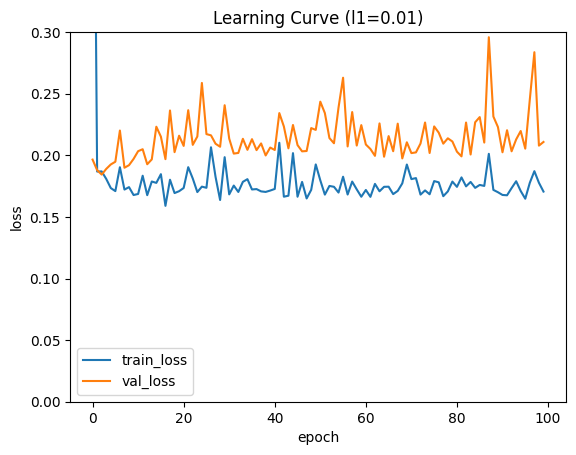

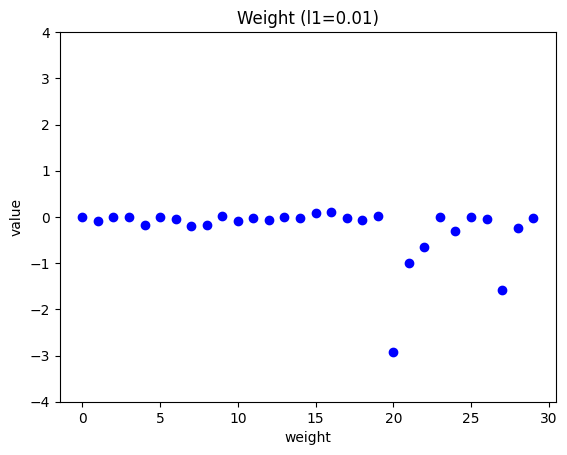

In [74]:
l1_list = [0.0001, 0.001, 0.01]
for l1 in l1_list:
  lyr =  SingleLayer(l1=l1)

  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l1={})'.format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()
  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l1={})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [75]:
layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

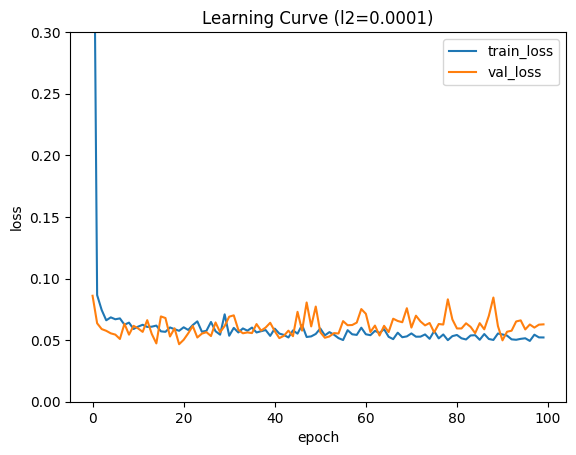

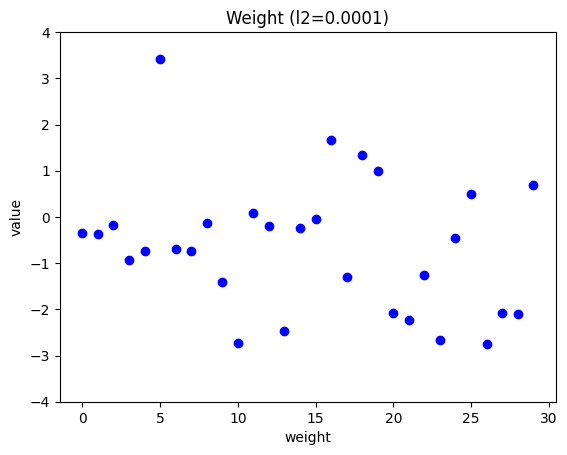

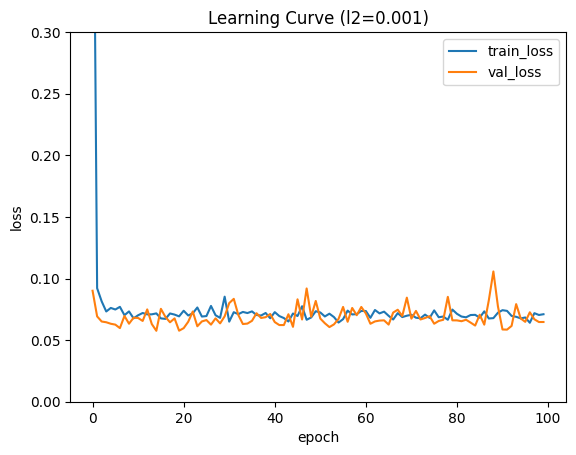

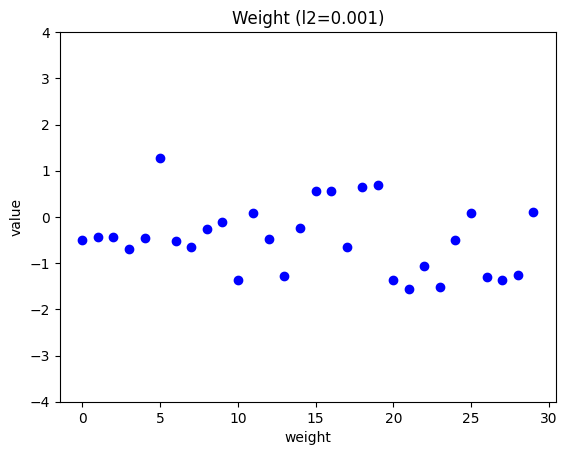

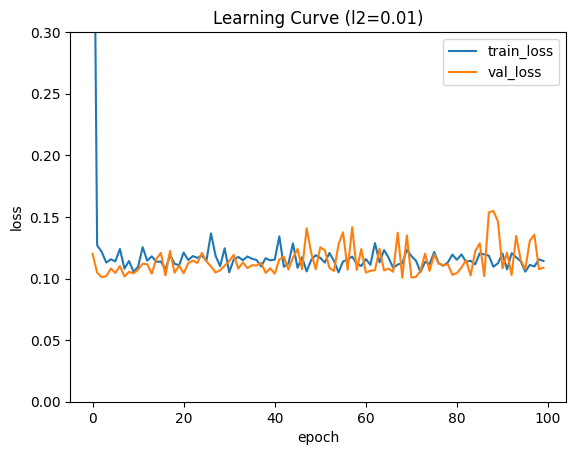

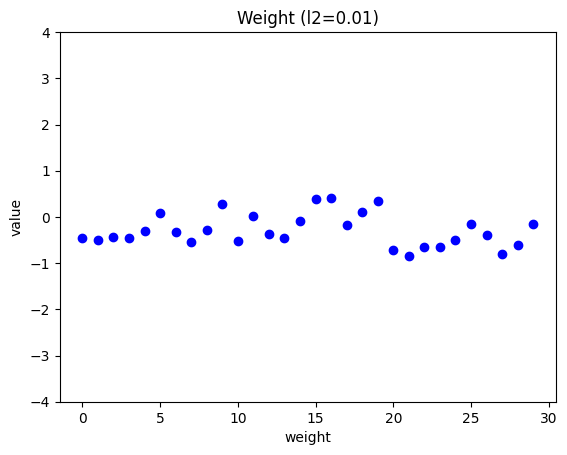

In [76]:
l2_list = [0.0001, 0.001, 0.01]
for l2 in l2_list:
  lyr =  SingleLayer(l2=l2)

  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title('Learning Curve (l2={})'.format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'])
  plt.ylim(0, 0.3)
  plt.show()
  plt.plot(lyr.w, 'bo')
  plt.title('Weight (l2={})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4, 4)
  plt.show()

In [77]:
layer6 = SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.978021978021978

In [78]:
np.sum(layer6.predict(x_val_scaled) == y_val)

89

In [79]:
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

In [80]:
validation_scores = []

In [81]:
k = 10
bins = len(x_train_all) // k

for i in range(k):
  start  = i  * bins
  end  = (i+1)*bins
  val_fold =  x_train_all[start:end]
  val_target = y_train_all[start:end]

  train_index= list(range(0, start))+list(range(end, len(x_train)))
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  train_mean = np.mean(train_fold, axis=0)
  train_std = np.std(train_fold, axis=0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled=  (val_fold - train_mean) / train_std

  lyr =  SingleLayer(l2=0.01)
  lyr.fit(train_fold_scaled, train_target, epochs=50)
  score = lyr.score(val_fold_scaled, val_target)
  validation_scores.append(score)

print(np.mean(validation_scores))

from sklearn.model_selection import cross_validate
sgg = SGDClassifier(loss='log', penalty='12', alpha=0.001, random_state=42)
scores = cross_validate(sgd, x_train_all, y_train_all, cv=10)
print(np.mean(scores['test_score']))

0.9711111111111113
0.850096618357488


In [82]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), sgd)
scores = cross_validate(pipe, x_train_all, y_train_all, cv=10, return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# Ridge (L2규제), Lasso (L1규제), ElasticNet (L1+L2 규제)
# 사용은 LinearRegression과 거의 같음
from sklearn.model_selection import cross_val_score

In [84]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,test_size=0.2, random_state=42)

In [85]:
print(x_train.shape, x_val.shape)

(364, 30) (91, 30)


In [86]:
class SingleLayer:
  def __init__(self,  learning_rate=0.1, l1=0, l2=0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self, x):
    z = np.dot(x, self.w) + self.b # 선형 출력을 계산합니다.
    return z

  def backprop(self, x, err):
    m = len(x)
    w_grad = np.dot(x.T, err) / m # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = np.sum(err) / m # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad

  def add_bias(self, X):
    return np.c_[np.ones((X.shape[0], 1)), X] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가

  def activation(self, z):
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val) # 정방향 계산을 수행합니다.
    a = self.activation(z) # 활성화 함수를 적용합니다.
    a = np.clip(a, 1e-10, 1-1e-10) # 출력 값을 클리핑합니다.
# 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
    val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

  def reg_loss(self):
     return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

  def fit(self, x, y, epochs=100, x_val=None, y_val=None):
    y =  y.reshape(-1,1)
    y_val =  y_val.reshape(-1,1)
    m = len(x)
    self.w = np.ones((x.shape[1], 1)) # 가중치를 초기화
    self.b = 0 # 절편을 초기화
    self.w_history.append(self.w.copy())
    for i in range(epochs): # epochs만큼 반복
        z = self.forpass(x) # 정방향 계산
        a = self.activation(z) # 활성화 함수 적용
        err = -(y - a) # 오차 계산
        w_grad, b_grad = self.backprop(x, err) # 역방향 계산
        w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
        self.w -= self.lr * w_grad # 가중치 업데이트
        self.b -= self.lr * b_grad # 절편 업데이트
        self.w_history.append(self.w.copy())
# 안전한 로그 계산을 위하여 클리핑한 후 손실을 누적함
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.sum(-(y*np.log(a)+(1-y)*np.log(1-a)))# 에포크마다 평균 손실을 저장
        self.losses.append((loss + self.reg_loss()) / m)
        self.update_val_loss(x_val,y_val)

  def predict(self, x):
    z = self.forpass(x)
    return z > 0 # 스텝 함수 적용

  def score(self, x, y):
    return np.mean(self.predict(x) == y)


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) # 훈련 데이터 표준화
x_val_scaled = scaler.transform(x_val) # 검증 데이터 표준화

In [88]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train,x_val=x_val_scaled, y_val=y_val, epochs=10000)
print(single_layer.score(x_val_scaled, y_val))

0.5319405868856418


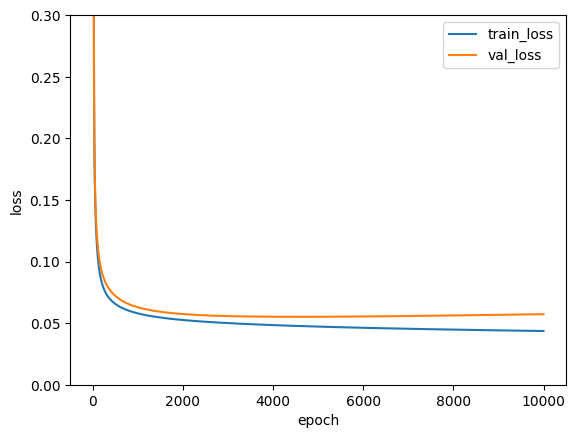

In [89]:
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

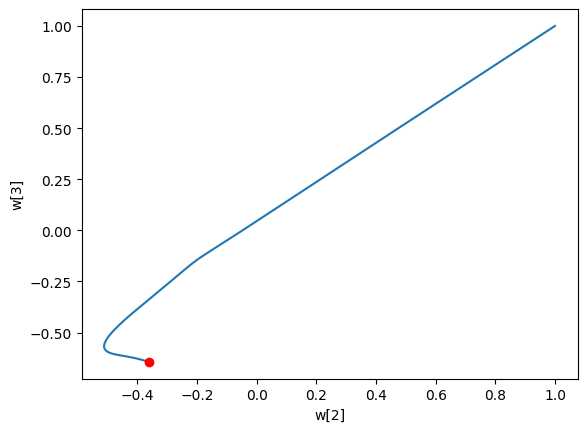

In [90]:
w2 = []
w3 = []
for w in single_layer.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [91]:
class DualLayer(SingleLayer):
  def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
    self.units = units # 은닉층의 뉴런 개수
    self.w1 = None # 은닉층의 가중치
    self.b1 = None # 은닉층의 절편
    self.w2 = None # 출력층의 가중치
    self.b2 = None # 출력층의 절편
    self.a1 = None # 은닉층의 활성화 출력
    self.losses = [] # 훈련 손실
    self.val_losses = [] # 검증 손실
    self.lr = learning_rate # 학습률
    self.l1 = l1 # L1 손실 하이퍼파라미터
    self.l2 = l2 # L2 손실 하이퍼파라미터

  def forpass(self, x):
      z1 = np.dot(x, self.w1) + self.b1 # 첫 번째 층의 선형 식을 계산합니다
      self.a1 = self.activation(z1) # 활성화 함수를 적용합니다
      z2 = np.dot(self.a1, self.w2) + self.b2 # 두 번째 층의 선형 식을 계산합니다.
      return z2

  def backprop(self, x, err):
      m = len(x) # 샘플 개수
      # 출력층의 가중치와 절편에 대한 그레이디언트를 계산합니다.
      w2_grad = np.dot(self.a1.T, err) / m
      b2_grad = np.sum(err) / m
      # 시그모이드 함수까지 그레이디언트를 계산합니다.
      err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
      # 은닉층의 가중치와 절편에 대한 그레이디언트를 계산합니다.
      w1_grad = np.dot(x.T, err_to_hidden) / m
      b1_grad = np.sum(err_to_hidden, axis=0) / m
      return w1_grad, b1_grad, w2_grad, b2_grad

  def reg_loss(self):
  # 은닉층과 출력층의 가중치에 규제를 적용합니다.
    return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

  def init_weights(self, n_features):
      self.w1 = np.ones((n_features, self.units)) # (특성 개수, 은닉층의 크기)
      self.b1 = np.zeros(self.units) # 은닉층의 크기
      self.w2 = np.ones((self.units, 1)) # (은닉층의 크기, 1)
      self.b2 = 0

  def fit(self, x, y, epochs = 100, x_val=None, y_val=None):
      y = y.reshape(-1, 1)
      y_val = y_val.reshape(-1, 1)
      m = len(x)
      self.init_weights (x.shape[1])
      #epochs
      for i in range(epochs):
        a =  self.training(x, y, m)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.sum(-(y*np.log(a) + (1-y) *np.log(1-a)))
        self.losses.append((loss + self.reg_loss()) /m)
        self.update_val_loss(x_val, y_val)

  def training(self, x, y, m):
    z = self.forpass(x)
    a = self.activation(z)
    err = - (y-a)
    #오차를 계산합니다.
    w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
    w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
    w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
    self.w1 -= self.lr * w1_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 *= self.lr * b2_grad
    return a

In [92]:
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train,x_val=x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

0.37362637362637363

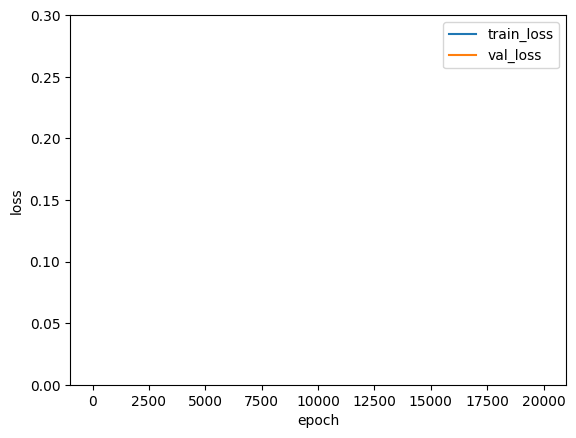

In [93]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [123]:
class RandomInitNetwork(DualLayer):
  def init_weights(self, n_features):
    np.random.seed(42)
    self.w1 = np.random.normal(0, 1, (n_features, self.units)) # 평균=0, 표준편차=1 (특성 개수, 은닉층의 크기)
    self.b1 = np.zeros(self.units) # 은닉층의 크기만큼 0으로 초기화
    self.w2 = np.random.normal(0, 1, (self.units, 1)) # (은닉층의 크기, 1)
    self.b2 = 0

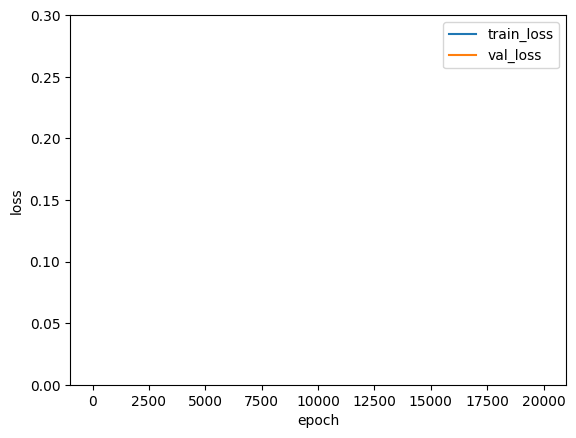

In [95]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [145]:
class MinibatchNetwork(RandomInitNetwork):
  def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
    super().__init__(units, learning_rate, l1, l2)
    self.batch_size = batch_size # 배치 크기

In [144]:
class DualLayer(SingleLayer):
  def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
    self.units = units # 은닉층의 뉴런 개수
    self.w1 = None # 은닉층의 가중치
    self.b1 = None # 은닉층의 절편
    self.w2 = None # 출력층의 가중치
    self.b2 = None # 출력층의 절편
    self.a1 = None # 은닉층의 활성화 출력
    self.losses = [] # 훈련 손실
    self.val_losses = [] # 검증 손실
    self.lr = learning_rate # 학습률
    self.l1 = l1 # L1 손실 하이퍼파라미터
    self.l2 = l2 # L2 손실 하이퍼파라미터

  def forpass(self, x):
      z1 = np.dot(x, self.w1) + self.b1 # 첫 번째 층의 선형 식을 계산합니다
      self.a1 = self.activation(z1) # 활성화 함수를 적용합니다
      z2 = np.dot(self.a1, self.w2) + self.b2 # 두 번째 층의 선형 식을 계산합니다.
      return z2

  def backprop(self, x, err):
      m = len(x) # 샘플 개수
      # 출력층의 가중치와 절편에 대한 그레이디언트를 계산합니다.
      w2_grad = np.dot(self.a1.T, err) / m
      b2_grad = np.sum(err) / m
      # 시그모이드 함수까지 그레이디언트를 계산합니다.
      err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
      # 은닉층의 가중치와 절편에 대한 그레이디언트를 계산합니다.
      w1_grad = np.dot(x.T, err_to_hidden) / m
      b1_grad = np.sum(err_to_hidden, axis=0) / m
      return w1_grad, b1_grad, w2_grad, b2_grad

  def reg_loss(self):
  # 은닉층과 출력층의 가중치에 규제를 적용합니다.
    return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

  def init_weights(self, n_features):
      self.w1 = np.ones((n_features, self.units)) # (특성 개수, 은닉층의 크기)
      self.b1 = np.zeros(self.units) # 은닉층의 크기
      self.w2 = np.ones((self.units, 1)) # (은닉층의 크기, 1)
      self.b2 = 0

  def gen_batch(self, x, y):
    length = len(x)
    bins  = length // self.batch_size
    if length % self.batch_size:
      bins += 1

    indexes = np.random.permutation(np.arange(len(x)))
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size(i * 1)
      yield x[start:end], y[start:end]

  def fit(self, x, y, epochs = 100, x_val=None, y_val=None):
      y_val = y_val.reshape(-1, 1)
      self.init_weights(x.shape[-1])
      np.random.seed(42)
      #epochs
      for i in range(epochs):
        loss = 0
        for x_batch, y_batch in self.gen_batch(x,y):
          m = len(x_batch)
          a =  self.training(x, y, m)
          a = np.clip(a, 1e-10, 1-1e-10)
          loss += np.sum(-(y_batch*np.log(a) + (1-y_batch) *np.log(1-a)))
        self.losses.append((loss + self.reg_loss()) / len(x))
        self.update_val_loss(x_val, y_val)

  def training(self, x, y, m):
    z = self.forpass(x)
    a = self.activation(z)
    err = - (y-a)
    #오차를 계산합니다.
    w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
    w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
    w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
    self.w1 -= self.lr * w1_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad
    self.b2 *= self.lr * b2_grad
    return a

0.5347180292235237


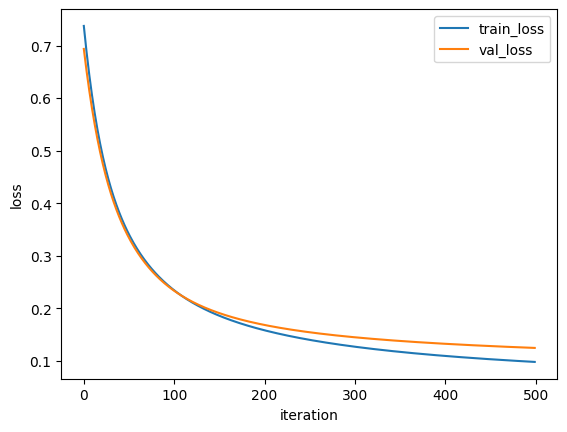

In [98]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=32)
minibatch_net.fit(x_train_scaled, y_train,x_val=x_val_scaled, y_val=y_val, epochs=500)
print(minibatch_net.score(x_val_scaled, y_val))
# 0.978021978021978
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

0.5347180292235237


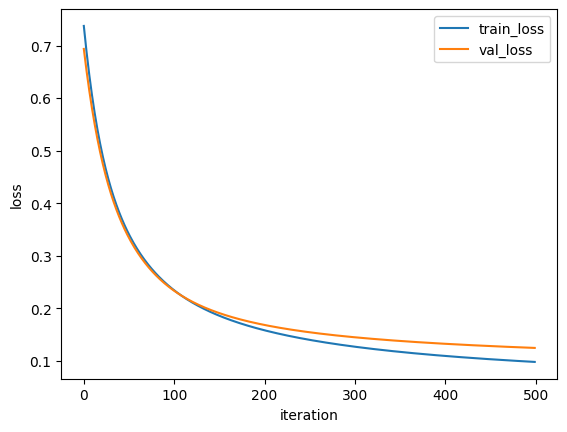

In [99]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=128)
minibatch_net.fit(x_train_scaled, y_train,x_val=x_val_scaled, y_val=y_val, epochs=500)
print(minibatch_net.score(x_val_scaled, y_val))
# 0.978021978021978
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [100]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, ), activation='logistic',
solver='sgd', alpha=0.01, batch_size=32, learning_rate_init=0.1, max_iter=1000)

In [101]:
mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

0.978021978021978

In [102]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets
print(adult.variables)


              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [103]:
x = X[['age','education-num']]

In [104]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [105]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=810)
val_x, test_x, val_y, test_y = train_test_split(x_val, y_val, test_size=0.2, random_state=810)

In [111]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, ), activation='logistic',
solver='sgd', alpha=0.01, batch_size=32, learning_rate_init=0.1, max_iter=500)

In [113]:
mlp.fit(x_train, y_train)
mlp.score(val_x, val_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5161868202175304

In [146]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=32)
minibatch_net.fit(x_train, y_train, x_val = val_x, y_val = val_y)
print(minibatch_net.score(x_val = val_x, y_val = val_y))
# 0.978021978021978

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 데이터 다운로드
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = [
    "Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
    "Color_intensity", "Hue", "diluted_wines", "Proline"
]
wine = pd.read_csv(wine_url, header=None, names=columns)

# 데이터 분리
wine1 = wine.copy()
X = wine1.drop('Class', axis=1)
y = wine1.pop('Class')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 표준화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [163]:
# Perceptron 모델 학습
perceptron = Perceptron(max_iter=500, random_state=42)
perceptron.fit(x_train, y_train)

# 평가
y_train_pred = perceptron.predict(x_train)
y_test_pred = perceptron.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Overfitting: {'Yes' if train_accuracy > test_accuracy else 'No'}")

Train Accuracy: 1.0
Test Accuracy: 0.9629629629629629
Overfitting: Yes


In [170]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# MLP 모델 구성
model = Sequential([
    Dense(13, input_dim=13, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
model.fit(x_train, y_train_encoded, epochs=50, validation_data=(x_test, y_test_encoded))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.3850 - loss: 1.0803 - val_accuracy: 0.3704 - val_loss: 1.1519
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3424 - loss: 1.0839 - val_accuracy: 0.4630 - val_loss: 1.1212
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4296 - loss: 1.0554 - val_accuracy: 0.4815 - val_loss: 1.0920
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4840 - loss: 1.0149 - val_accuracy: 0.5370 - val_loss: 1.0650
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4988 - loss: 0.9935 - val_accuracy: 0.5556 - val_loss: 1.0400
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4782 - loss: 0.9736 - val_accuracy: 0.5556 - val_loss: 1.0163
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5318 - loss: 0.9506 - val_accuracy: 0.5556 - val_loss: 0.9930
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5822 - loss: 0.9144 - val_accuracy: 0.5741 - val_loss: 0.9698
Epoch 9/50

In [171]:
train_loss, train_accuracy = model.evaluate(x_train, y_train_encoded, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)

print(f"Keras MLP Train Accuracy: {train_accuracy}")
print(f"Keras MLP Test Accuracy: {test_accuracy}")
print(f"Overfitting: {'Yes' if train_accuracy > test_accuracy else 'No'}")

Keras MLP Train Accuracy: 0.9516128897666931
Keras MLP Test Accuracy: 0.8888888955116272
Overfitting: Yes
